# Signal Processing of Musical Instruments

## Libraries

In [1]:
import numpy as np
from numpy.fft import rfft
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

## Part 0:

The clarinet and saxophone are playing the same note. The clarinet has a higher treble pitch ot it, while the saxophone has a lower bass tone to it. If one were to look at the notes being played on a muscial scale, they are the same note being played. Sound frequencies on sound boards are typically mixed into 4 categories. They are high, high-mid, low-mid, and low. The clarinet has a higher level of high and high-mid frequency, while the saxophone has a stronger lowmid frequency.

## Part 1:

### A

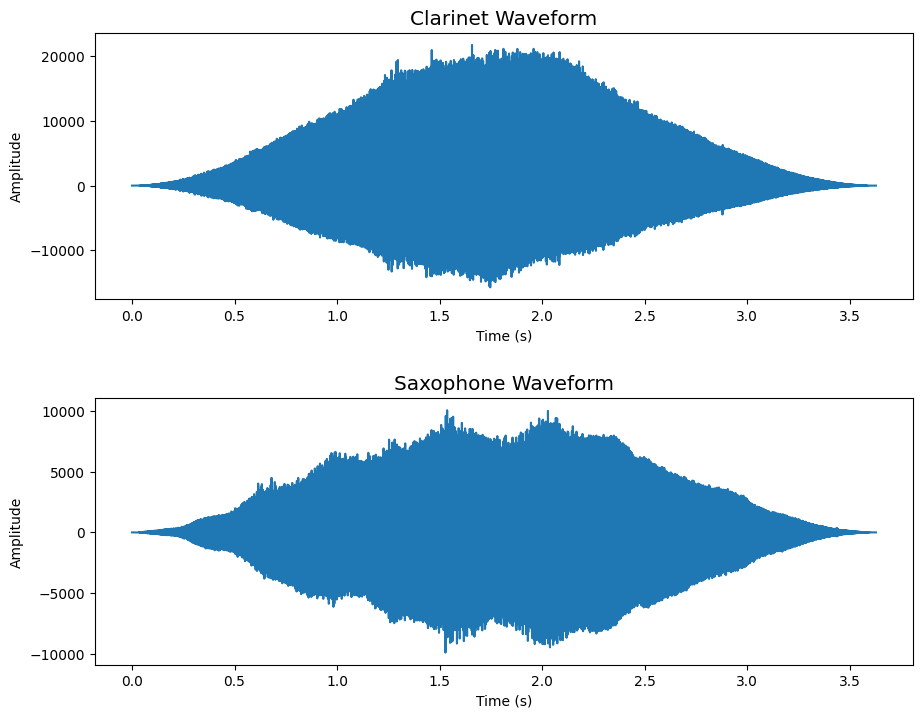

In [ ]:
saxophone_data = np.loadtxt('/data/saxophone.txt', float)
clarinet_data = np.loadtxt('/data/clarinet.txt', float)

saxophone_time=np.arange(len(saxophone_data))/44100
clarinet_time=np.arange(len(clarinet_data))/44100

fig, ax = plt.subplots(2,figsize=(10, 8))
fig.tight_layout(pad=5.0)
plt.rc('font', size=12)

ax[0].plot(clarinet_time,clarinet_data)
ax[0].set_title('Clarinet Waveform')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].plot(saxophone_time,saxophone_data)
ax[1].set_title('Saxophone Waveform')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

plt.show()



### B

In [3]:
saxophone_dft=rfft(saxophone_data)
clarinet_dft=rfft(clarinet_data)
print(f'Saxophone Data: {len(saxophone_data)} Saxophone DFT: {len(saxophone_dft)}')
print(f'Clarinet Data: {len(clarinet_data)} Clarinet DFT: {len(clarinet_dft)}')

Saxophone Data: 160000 Saxophone DFT: 80001
Clarinet Data: 160000 Clarinet DFT: 80001


The reason for DFT being half the length has to do with the Nyquist frequency. For smapled data, the Nyquist frequency is $\nu_{N_y}=\frac{1}{2τ}$, measured in hertz (cycles/s). The Nyquist frequency is the maximum frequency that can be unambiguously resolved in a Fourier transform. Typically the smple time $τ$ is chose short enough so that $\nu_{N_y}$ is bigger than the largest frequencies of interest in the data to be sampled. For audio signals, the industry standard sampling rate is 44,100 smaples per second, or 44,100 Hz, which means the Nyquist frequency is $\nu_{N_y}=22,050$ Hz.

### C

In [4]:
nn=160000
tau=1e-6
t=np.linspace(0,(nn-1)*tau,nn)
dnu=1/(nn*tau)
nu=np.linspace(0,(nn/2)*dnu,nn)
freq=np.linspace(0,(nn/2)*dnu-1,int(nn/2+1))

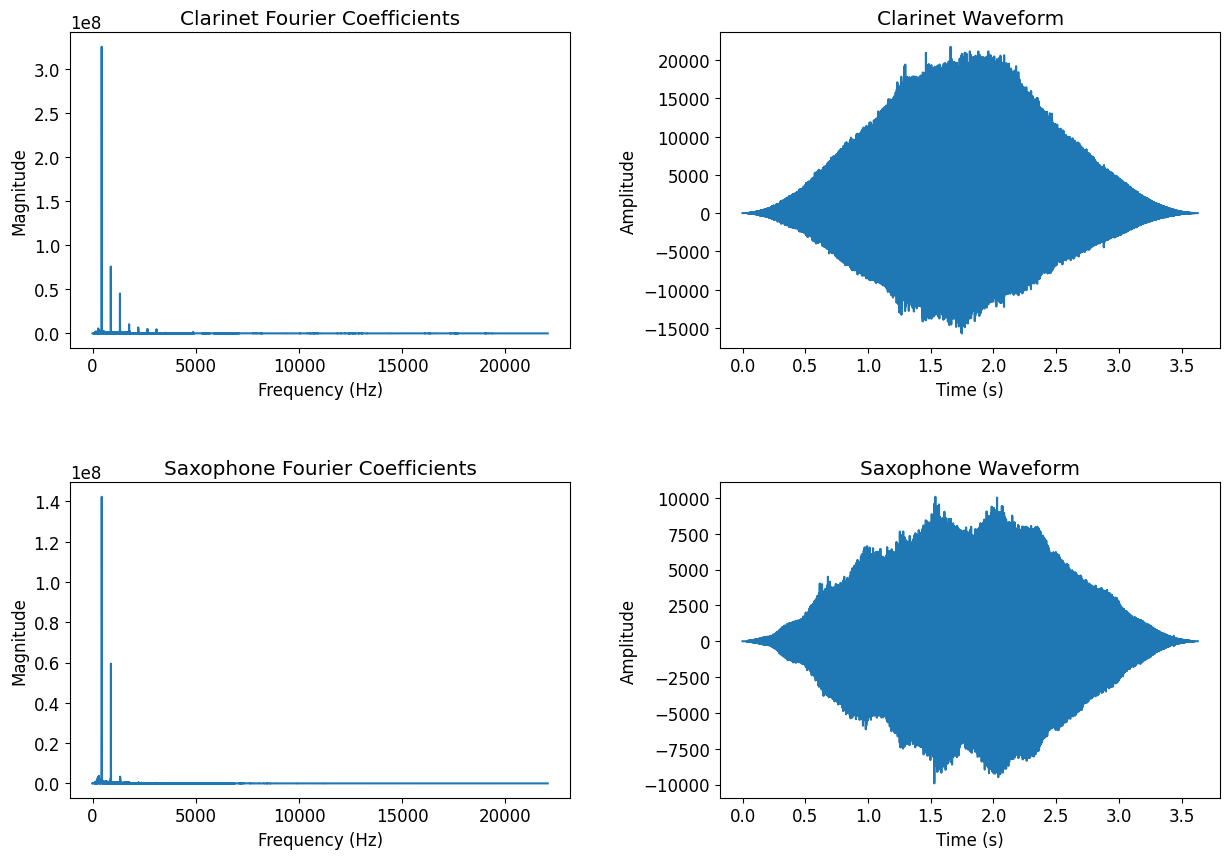

In [5]:
clarinet_freq = np.fft.rfftfreq(len(clarinet_data), d=1 / 44100)
saxophone_freq = np.fft.rfftfreq(len(saxophone_data), d=1 / 44100)

fig, ax = plt.subplots(2,2,figsize=(14, 10))
fig.tight_layout(pad=6.0)
plt.rc('font', size=12)

ax[0,0].plot(clarinet_freq, np.abs(clarinet_dft))
ax[0,0].set_title('Clarinet Fourier Coefficients')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('Magnitude')

ax[1,0].plot(saxophone_freq, np.abs(saxophone_dft))
ax[1,0].set_title('Saxophone Fourier Coefficients')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].set_ylabel('Magnitude')

ax[0,1].plot(clarinet_time,clarinet_data)
ax[0,1].set_title('Clarinet Waveform')
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('Amplitude')

ax[1,1].plot(saxophone_time,saxophone_data)
ax[1,1].set_title('Saxophone Waveform')
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_ylabel('Amplitude')

plt.show()

### D

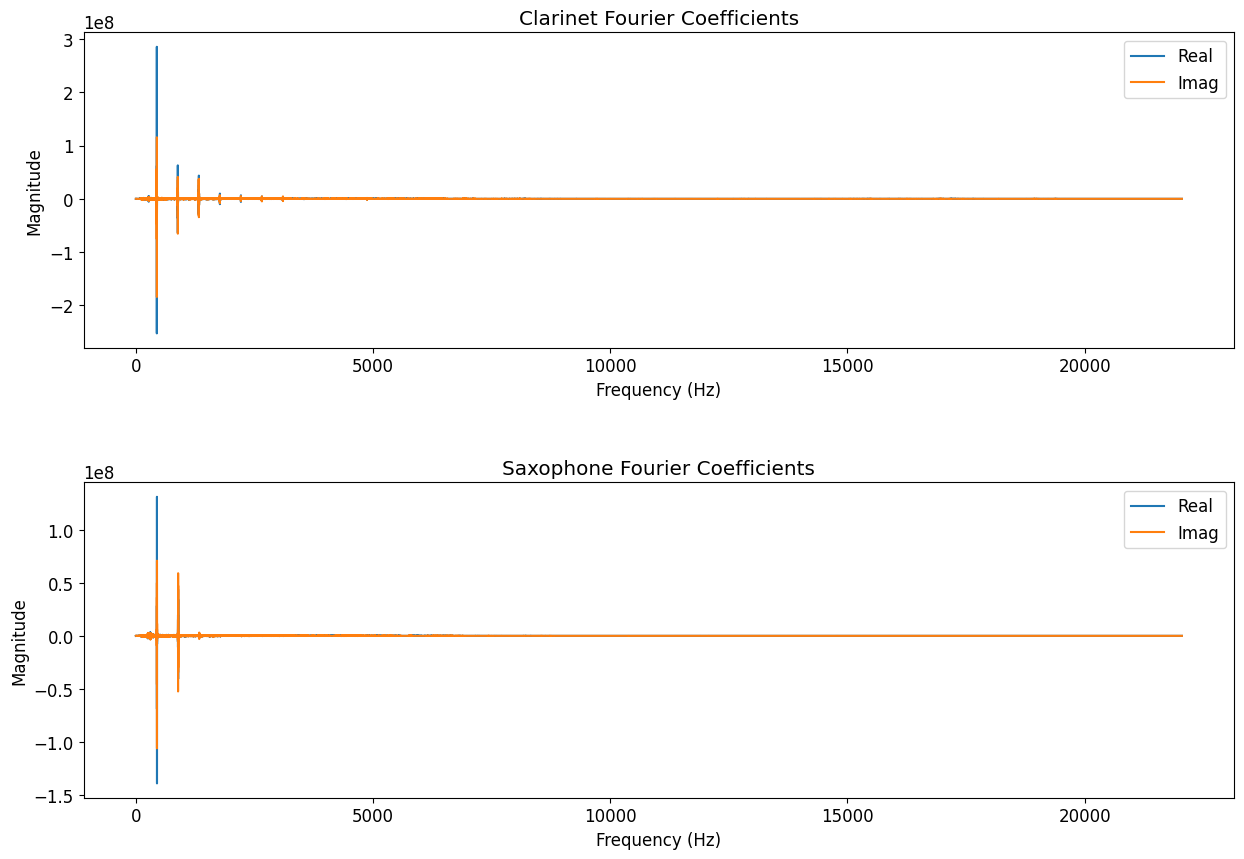

In [6]:
fig, ax = plt.subplots(2,figsize=(14, 10))
fig.tight_layout(pad=6.0)
plt.rc('font', size=12)

ax[0].plot(clarinet_freq, np.real(clarinet_dft), label='Real')
ax[0].plot(clarinet_freq, np.imag(clarinet_dft), label='Imag')
ax[0].set_title('Clarinet Fourier Coefficients')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[0].legend()

ax[1].plot(saxophone_freq, np.real(saxophone_dft), label='Real')
ax[1].plot(saxophone_freq, np.imag(saxophone_dft), label='Imag')
ax[1].set_title('Saxophone Fourier Coefficients')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].legend()

plt.show()

## Part 2

### A

In [7]:
print(f'Saxophone DFT Index: {saxophone_dft.argmax()}')
print(f'Clarinet DFT Index: {clarinet_dft.argmax()}')
print(f'Saxophone dominant frequency: {saxophone_freq[1615]:.3f} Hz')
print(f'Clarinet dominant frequency: {clarinet_freq[1606]:.3f} Hz')

Saxophone DFT Index: 1615
Clarinet DFT Index: 1606
Saxophone dominant frequency: 445.134 Hz
Clarinet dominant frequency: 442.654 Hz


The musical note A is being played on the clarinet and the saxophone. Middle C has a frequency of 261 Hz. The musical note A is being played higher on the treble clef. Because of that, it will have a higher frequency that middle C. The saxophone and clarinet have frequencies of 445 Hz and 442 Hz respectively.


https://virtualpiano.net/#:~:text=1%201.%20Select%20a%20song%20in%20the%20Virtual,on%20your%20computer%20keyboard%20to%20play%20the%20song.

### B

- The saxophone's spectrum shows that it's more centered, which implies that it has a richer tone than the clarinet.

- the clarinet spectrum shows a distinct series of peaks.This indicates the presence of specific harmonics unlike the saxophone.

- The clarinet has a distinct focused sound, which is indicated by its frequency.

- The saxophone has a richer sound, which is also indicated by its frequency.

- How do these differences affect the way they sound? The clarinet is more of a treble instrument, while the saxophone is more of a bass instrument. So, the differences that you see in the Fourier Coefficients and Waveform plots in terms of magnitude and amplitude implies that one instrument will sound deepr and the other will sound higher in pitch.

In essence, the Waveform and Fourier Coefficent plots show that the clarinet has a higher more resonating pitch, while the saxophone has a more rich and smooth tone to it.

## Part 3

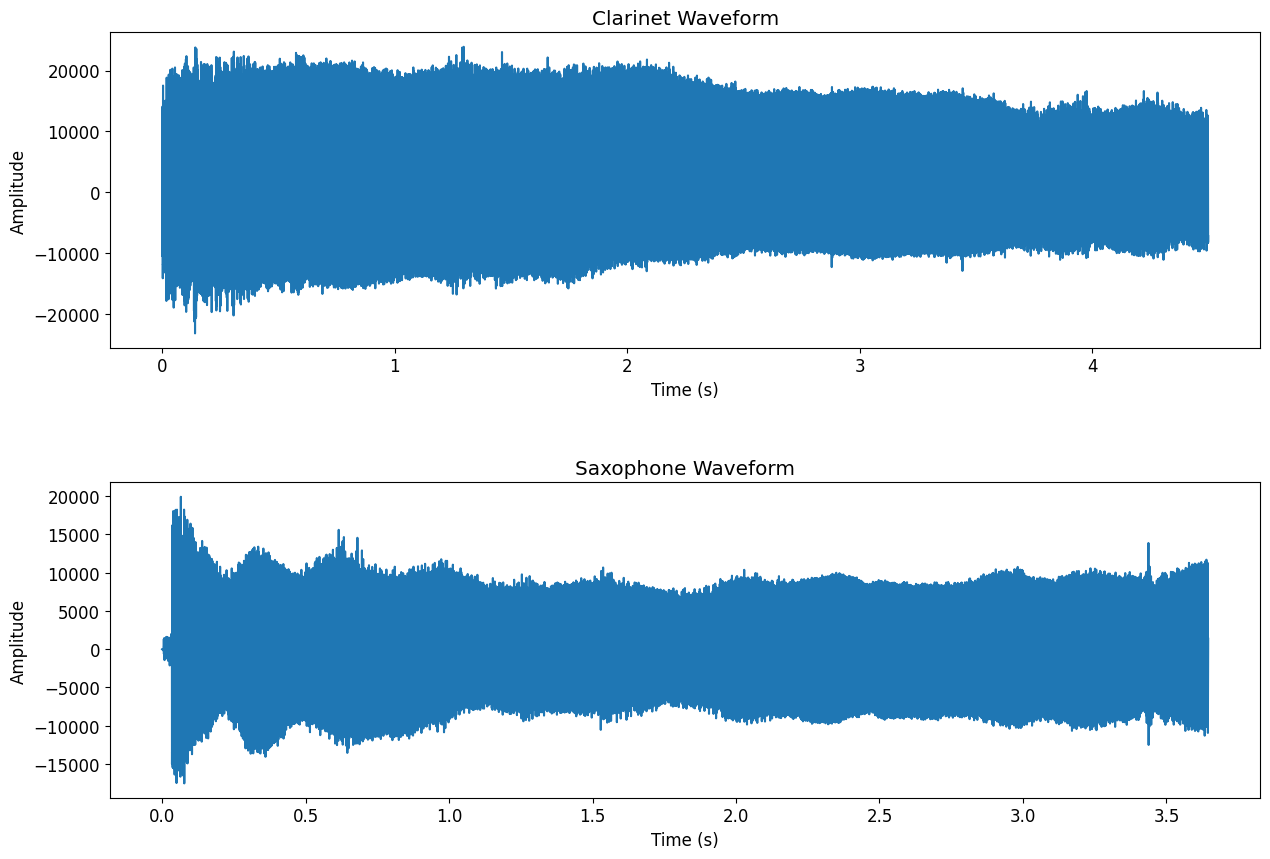

In [ ]:
rate, cwavedata = scipy.io.wavfile.read('/data/clarinet.wav')
rate, swavedata = scipy.io.wavfile.read('/data/saxophone.wav')

swavedata = swavedata[:,0]
cwavedata=cwavedata[:,0]
swave_time=np.arange(len(swavedata))/44100
cwave_time=np.arange(len(cwavedata))/44100

fig, ax = plt.subplots(2,figsize=(14, 10))
fig.tight_layout(pad=6.0)
plt.rc('font', size=12)

ax[0].plot(cwave_time,cwavedata)
ax[0].set_title('Clarinet Waveform')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].plot(swave_time,swavedata)
ax[1].set_title('Saxophone Waveform')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

plt.show()

## Part 4

### A

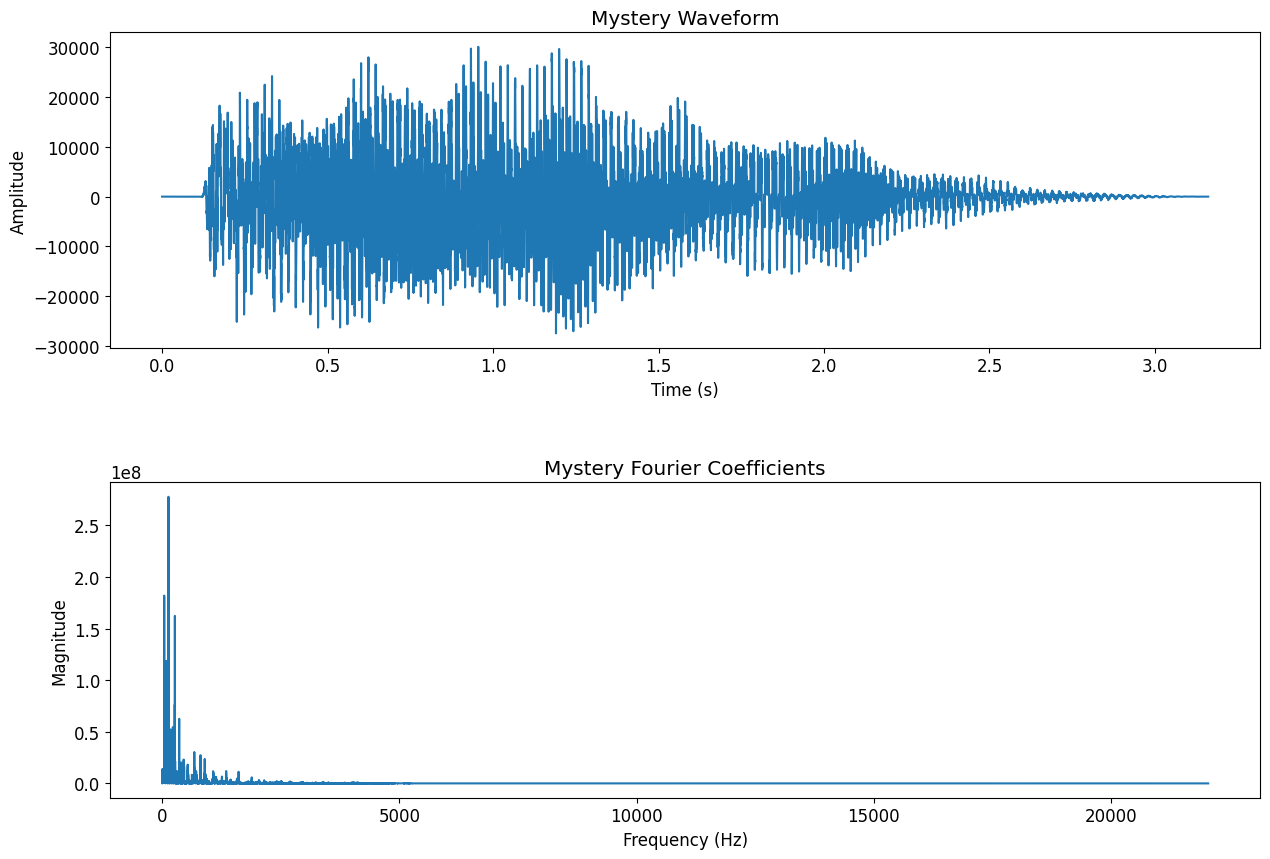

In [ ]:
mystery_data = np.loadtxt('/data/mystery.txt', float)

mystery_time=np.arange(len(mystery_data))/44100
mystery_freq = np.fft.rfftfreq(len(mystery_data), d=1 / 44100)
mystery_dft = rfft(mystery_data)

fig, ax = plt.subplots(2,figsize=(14, 10))
fig.tight_layout(pad=6.0)
plt.rc('font', size=12)

ax[0].plot(mystery_time,mystery_data)
ax[0].set_title('Mystery Waveform')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].plot(mystery_freq, np.abs(mystery_dft))
ax[1].set_title('Mystery Fourier Coefficients')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')

plt.show()

### B

- The clarinet and saxophone both play one single note. The frequencies show them as clean and continuous. This appears layered. My initial guess is that more than one note is being played. 
- After listening to it, I have concluded that this is the Macintosh startup sound. The notes are played as a single chord; C major, E flat major, and G major.They are being played on a synthesizer. Looking at the mystery waveform, you can tell that the person playing the synthesizer has their foot on the pedal, because the sound slowly fades away rather than ending abruptly. The midtone frequencies are the dominant ones. There's a significant amount of reverb.